In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 0. data load

In [2]:
data = pd.read_csv("./nationalhealth_2010to2021.csv")
data

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35624,b'R904322404',b'R9043224',2021.0,8.0,2.0,1.0,53.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35625,b'R904332601',b'R9043326',2021.0,8.0,2.0,1.0,50.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35626,b'R904346201',b'R9043462',2021.0,8.0,2.0,2.0,54.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35627,b'R904353001',b'R9043530',2021.0,8.0,2.0,1.0,45.0,3.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. meta data file 사용하는 데이터만 남기기

In [22]:
list(data.columns), data.shape

(['ID',
  'ID_fam',
  'year',
  'region',
  'town_t',
  'sex',
  'age',
  'incm',
  'ho_incm',
  'incm5',
  'ho_incm5',
  'edu',
  'occp',
  'cfam',
  'genertn',
  'allownc',
  'marri_1',
  'marri_2',
  'fam_rela',
  'tins',
  'D_1_1',
  'educ',
  'EC1_1',
  'EC_wht_23',
  'EC_wht_5',
  'EC_pedu_1',
  'EC_pedu_2',
  'BD1_11',
  'BD2_1',
  'BD2_31',
  'dr_month',
  'BP6_10',
  'BP7',
  'mh_stress',
  'BS3_1',
  'BE3_31',
  'BE5_1',
  'LW_mt',
  'LW_mt_a1',
  'LW_br',
  'HE_fst',
  'HE_HPdr',
  'HE_DMdr',
  'HE_mens',
  'HE_prg',
  'HE_HPfh1',
  'HE_HPfh2',
  'HE_HPfh3',
  'HE_HLfh1',
  'HE_HLfh2',
  'HE_HLfh3',
  'HE_IHDfh1',
  'HE_IHDfh2',
  'HE_IHDfh3',
  'HE_STRfh1',
  'HE_STRfh2',
  'HE_STRfh3',
  'HE_DMfh1',
  'HE_DMfh2',
  'HE_DMfh3',
  'HE_rPLS',
  'HE_sbp',
  'HE_dbp',
  'HE_ht',
  'HE_wt',
  'HE_wc',
  'HE_BMI',
  'HE_glu',
  'HE_HbA1c',
  'HE_chol',
  'HE_HDL_st2',
  'HE_TG',
  'HE_ast',
  'HE_alt',
  'HE_hepaB',
  'HE_HB',
  'HE_HCT',
  'HE_BUN',
  'HE_crea',
  'HE_WBC',
  'H

In [38]:
meta = pd.read_excel("./meta_data20.xlsx")
meta
pd.merge(pd.DataFrame({'variable':data.columns}),meta).to_excel('modified_meta_data20.xlsx')

,variable,variable description,option description,etc,data type,not applicable,unknown,variable bins,selected
0,ID,개인 아이디,NaN,[],object,NaN,NaN,NaN,1.0
1,ID_fam,가구 아이디,NaN,[],object,NaN,NaN,NaN,1.0
2,year,조사연도,NaN,[],object,NaN,NaN,NaN,1.0
3,region,17개 시도,1 : 서울 | 2 : 부산 | 3 : 대구 | 4 : 인천 | 5 : 광주 | 6...,[],category,NaN,NaN,NaN,1.0
4,town_t,동/읍면 구분,1 : 동 | 2 : 읍·면 |,[],category,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
104,N_RETIN,레티놀,NaN,['1일 레티놀 섭취량(μg)'],numeric,NaN,NaN,31.36:92.14059426160394:183.6961367088453,1.0
105,N_B1,티아민,NaN,['1일 티아민 섭취량(mg)'],numeric,NaN,NaN,0.725991:1.036045006600025:1.465848161691283,1.0
106,N_B2,리보플라빈,NaN,['1일 리보플라빈 섭취량(mg)'],numeric,NaN,NaN,0.9444523070299011:1.4095695333508287:2.025420...,1.0
107,N_NIAC,나이아신,NaN,['1일 나이아신 섭취량(mg)'],numeric,NaN,NaN,6.907111013905634:10.079930056683114:14.534657...,1.0


# 1. 연도별 질병 순위 추출

## 1. 연도별 데이터프레임 생성

In [60]:
years = [int("20" + str(x)) for x in range(10,22)]
years
for year in years:
    globals()["data_{}".format(year)] = data[data["year"] == year].copy()

In [61]:
lst_years = [data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]
diseasename = list(data.iloc[:,-13:].columns)

In [64]:
data_2010

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,b'P310460201',b'P3104602',2010.0,16.0,2.0,2.0,74.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0
385,b'P310482401',b'P3104824',2010.0,16.0,2.0,1.0,77.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
386,b'P310660901',b'P3106609',2010.0,16.0,2.0,1.0,75.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
387,b'P311520701',b'P3115207',2010.0,16.0,1.0,1.0,70.0,4.0,4.0,5.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


u40     14
u65    185
u80    190
Name: cat_age, dtype: int64
u40     735
u65    1843
u80    1033
Name: cat_age, dtype: int64
u40     631
u65    1720
u80     980
Name: cat_age, dtype: int64
u40     603
u65    1593
u80     684
Name: cat_age, dtype: int64
u40     548
u65    1429
u80     745
Name: cat_age, dtype: int64
u40     428
u65    1496
u80     822
Name: cat_age, dtype: int64
u40     660
u65    1576
u80     932
Name: cat_age, dtype: int64
u40     612
u65    1835
u80    1018
Name: cat_age, dtype: int64
u40     658
u65    1912
u80     995
Name: cat_age, dtype: int64
u40     651
u65    1941
u80    1084
Name: cat_age, dtype: int64
u40     503
u65    1503
u80     809
Name: cat_age, dtype: int64
u40     453
u65    1697
u80    1111
Name: cat_age, dtype: int64


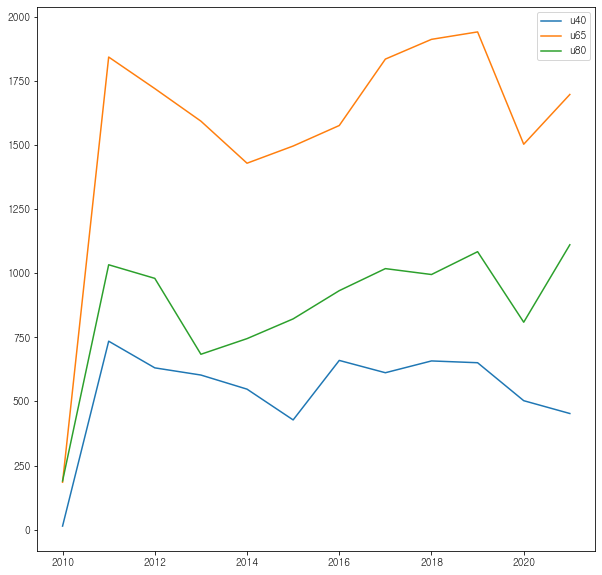

In [97]:
plt.figure(figsize=(10,10))
lst_u40 = []
lst_u65 = []
lst_u80 = []
for year in lst_years:
    year['cat_age'] = pd.cut(year["age"], bins =[0, 40, 65, 100], labels = ["u40", "u65", "u80"])
    print(year['cat_age'].value_counts().sort_index())
    lst_u40.append(year['cat_age'].value_counts().sort_index()[0])
    lst_u65.append(year['cat_age'].value_counts().sort_index()[1])
    lst_u80.append(year['cat_age'].value_counts().sort_index()[2])
plt.plot( years, lst_u40)
plt.plot( years, lst_u65)
plt.plot( years, lst_u80)
plt.legend(["u40", "u65", "u80"])

In [23]:
len_years = []
for year in lst_years:
    len_years.append(len(year))
len_years

[389, 3611, 3331, 2880, 2722, 2746, 3168, 3465, 3565, 3676, 2815, 3261]

In [5]:
diseasename

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [6]:
disease = []
for year in lst_years:
    for i in year.iloc[:,-13:].columns:
        print(year.iloc[:,-13:][i].value_counts())
        if len(year.iloc[:,-13:][i].value_counts()) == 3:
            disease.append(year.iloc[:,-13:][i].value_counts().values[2])
        else: disease.append(year.iloc[:,-13:][i].value_counts()[1])


0.0    217
1.0    172
Name: 비만, dtype: int64
1.0    248
0.0    141
Name: 고혈압, dtype: int64
1.0    386
0.0      3
Name: 당뇨병, dtype: int64
0.0    278
1.0    111
Name: 고콜레스테롤혈증, dtype: int64
0.0    282
1.0    107
Name: 고중성지방혈증, dtype: int64
0.0    380
1.0      9
Name: B형간염, dtype: int64
0.0    343
1.0     46
Name: 빈혈, dtype: int64
-1.0    371
 1.0     18
Name: 뇌졸중, dtype: int64
-1.0    358
 1.0     28
 0.0      3
Name: 협심증또는심근경색증, dtype: int64
-1.0    361
 1.0     17
 0.0     11
Name: 천식, dtype: int64
-1.0    386
 1.0      2
 0.0      1
Name: 아토피피부염, dtype: int64
-1.0    289
 1.0     85
 0.0     15
Name: 골관절염, dtype: int64
-1.0    329
 0.0     48
 1.0     12
Name: 우울증, dtype: int64
0.0    2382
1.0    1229
Name: 비만, dtype: int64
0.0    2265
1.0    1346
Name: 고혈압, dtype: int64
0.0    3086
1.0     525
Name: 당뇨병, dtype: int64
0.0    2980
1.0     631
Name: 고콜레스테롤혈증, dtype: int64
0.0    3019
1.0     592
Name: 고중성지방혈증, dtype: int64
0.0    3493
1.0     118
Name: B형간염, dtype: int64
0.0    3293
1.0

In [7]:
df_disease = pd.DataFrame(np.array(disease).reshape(-1,13))
df_disease.columns = diseasename
df_disease.index = years
df_disease

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
2010,172,248,386,111,107,9,46,18,3,11,1,15,12
2011,1229,1346,525,631,592,118,318,7,12,50,51,153,174
2012,1086,1259,483,607,511,134,292,4,15,42,52,127,154
2013,985,996,467,529,448,99,243,73,88,92,48,393,133
2014,876,883,410,483,438,91,218,79,74,77,36,351,161
2015,970,1028,404,616,429,103,235,87,101,84,48,445,150
2016,1153,1154,488,748,507,109,310,76,113,97,64,457,159
2017,1205,1241,550,896,506,125,324,93,109,104,43,520,165
2018,1261,1341,568,931,533,97,326,98,126,109,64,517,161
2019,1287,1346,589,1031,495,104,354,98,124,106,71,506,184


In [40]:
np.array(len_years)

array([ 389, 3611, 3331, 2880, 2722, 2746, 3168, 3465, 3565, 3676, 2815,
       3261])

In [36]:
df_disease_scaled = (df_disease.T/ np.array(len_years)).T
df_disease_scaled

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
2010,0.442159,0.637532,0.992288,0.285347,0.275064,0.023136,0.118252,0.046272,0.007712,0.028278,0.002571,0.038560,0.030848
2011,0.340349,0.372750,0.145389,0.174744,0.163944,0.032678,0.088064,0.001939,0.003323,0.013847,0.014124,0.042371,0.048186
2012,0.326028,0.377965,0.145002,0.182228,0.153407,0.040228,0.087661,0.001201,0.004503,0.012609,0.015611,0.038127,0.046232
2013,0.342014,0.345833,0.162153,0.183681,0.155556,0.034375,0.084375,0.025347,0.030556,0.031944,0.016667,0.136458,0.046181
2014,0.321822,0.324394,0.150625,0.177443,0.160911,0.033431,0.080088,0.029023,0.027186,0.028288,0.013226,0.128949,0.059148
2015,0.353241,0.374363,0.147123,0.224326,0.156227,0.037509,0.085579,0.031682,0.036781,0.030590,0.017480,0.162054,0.054625
2016,0.363952,0.364268,0.154040,0.236111,0.160038,0.034407,0.097854,0.023990,0.035669,0.030619,0.020202,0.144255,0.050189
2017,0.347763,0.358153,0.158730,0.258586,0.146032,0.036075,0.093506,0.026840,0.031457,0.030014,0.012410,0.150072,0.047619
2018,0.353717,0.376157,0.159327,0.261150,0.149509,0.027209,0.091445,0.027489,0.035344,0.030575,0.017952,0.145021,0.045161
2019,0.350109,0.366159,0.160229,0.280468,0.134657,0.028292,0.096300,0.026659,0.033732,0.028836,0.019314,0.137650,0.050054


In [14]:
# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# mms.fit(df_disease)
# df_disease_scaled= mms.transform(df_disease)
# df_disease_scaled=pd.DataFrame(df_disease_scaled)
# df_disease_scaled.columns = diseasename
# df_disease_scaled.index = years
# pd.DataFrame(df_disease_scaled)

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.148936,0.000000,0.000000,0.000000,0.000000,0.000000
2011,0.947982,1.000000,0.628959,0.565217,1.000000,0.872,0.759777,0.031915,0.069231,0.371429,0.675676,0.273267,0.941860
2012,0.819731,0.920765,0.438914,0.539130,0.832990,1.000,0.687151,0.000000,0.092308,0.295238,0.689189,0.221782,0.825581
2013,0.729148,0.681239,0.366516,0.454348,0.703093,0.720,0.550279,0.734043,0.653846,0.771429,0.635135,0.748515,0.703488
2014,0.631390,0.578324,0.108597,0.404348,0.682474,0.656,0.480447,0.797872,0.546154,0.628571,0.472973,0.665347,0.866279
2015,0.715695,0.710383,0.081448,0.548913,0.663918,0.752,0.527933,0.882979,0.753846,0.695238,0.635135,0.851485,0.802326
2016,0.879821,0.825137,0.461538,0.692391,0.824742,0.800,0.737430,0.765957,0.846154,0.819048,0.851351,0.875248,0.854651
2017,0.926457,0.904372,0.742081,0.853261,0.822680,0.928,0.776536,0.946809,0.815385,0.885714,0.567568,1.000000,0.889535
2018,0.976682,0.995446,0.823529,0.891304,0.878351,0.704,0.782123,1.000000,0.946154,0.933333,0.851351,0.994059,0.866279
2019,1.000000,1.000000,0.918552,1.000000,0.800000,0.760,0.860335,1.000000,0.930769,0.904762,0.945946,0.972277,1.000000


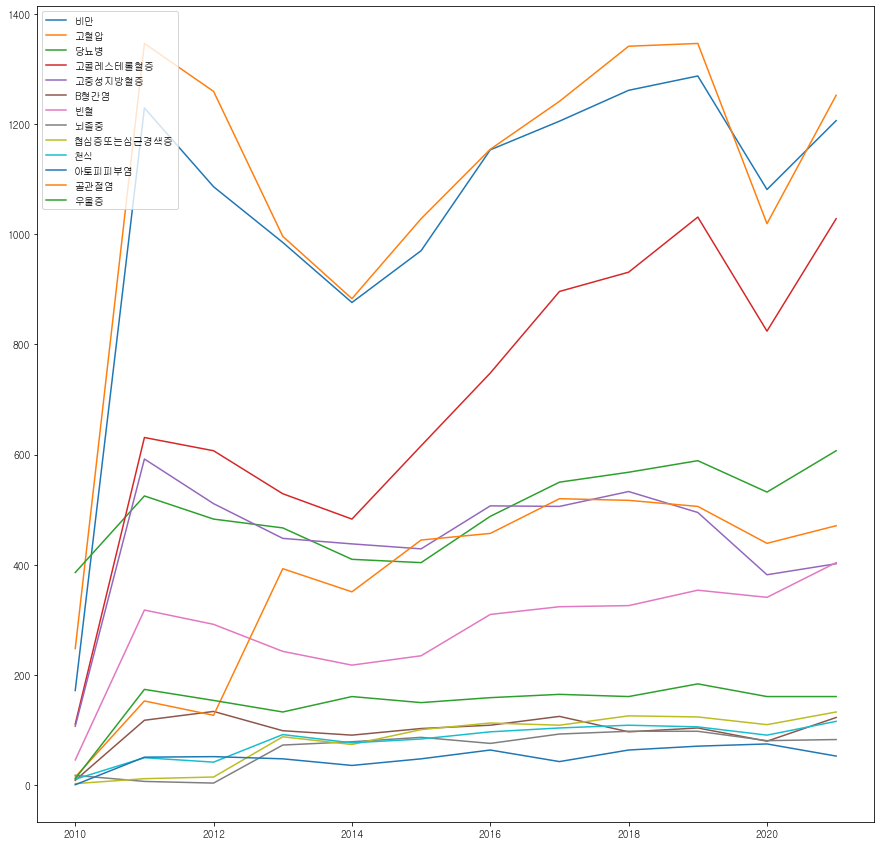

In [99]:
plt.figure(figsize=(15,15))
for i in diseasename:
    plt.plot(df_disease[i])
plt.legend(diseasename)

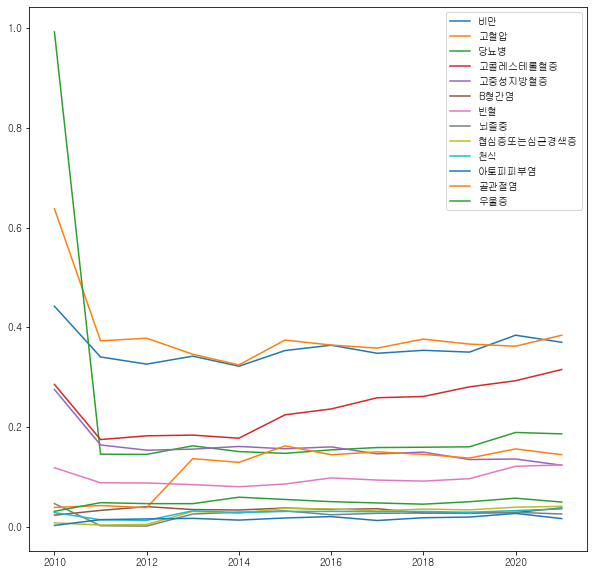

In [100]:
plt.figure(figsize=(10,10))
for i in diseasename:
    plt.plot(df_disease_scaled[i])
plt.legend(diseasename)
# for i in ["비만", "고혈압", "당뇨병", "고콜레스테롤혈증", "B형간염"]:
#     plt.plot(df_disease[i])
#뭣도 없잖슴...